In [138]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import RMSprop

In [139]:
df = pd.read_csv("winequality-red.csv")
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [140]:
features_train = train_data.copy()
labels_train = features_train.pop('quality')
features_train = np.array(features_train)
print("Train set : {train_set} , shape: {size}".format(train_set=features_train,size=features_train.shape))


features_test = test_data.copy()
labels_test = features_test.pop('quality')
features_test = np.array(features_test)
print("Test set : {test_set} , shape: {size}".format(test_set=features_test,size=features_test.shape))

Train set : [[ 8.7   0.69  0.31 ...  3.48  0.74 11.6 ]
 [ 6.1   0.21  0.4  ...  3.25  0.59 11.9 ]
 [10.9   0.39  0.47 ...  3.3   0.75  9.8 ]
 ...
 [ 7.2   0.62  0.06 ...  3.51  0.54  9.5 ]
 [ 7.9   0.2   0.35 ...  3.32  0.8  11.9 ]
 [ 5.8   0.29  0.26 ...  3.39  0.54 13.5 ]] , shape: (1279, 11)
Test set : [[ 7.7    0.56   0.08  ...  3.24   0.66   9.6  ]
 [ 7.8    0.5    0.17  ...  3.39   0.48   9.5  ]
 [10.7    0.67   0.22  ...  3.28   0.98   9.9  ]
 ...
 [ 8.3    0.6    0.25  ...  3.15   0.53   9.8  ]
 [ 8.8    0.27   0.39  ...  3.15   0.69  11.2  ]
 [ 9.1    0.765  0.04  ...  3.29   0.54   9.7  ]] , shape: (320, 11)


In [141]:
'''
normalize = layers.Normalization()
normalize.adapt(features_train)
model = keras.Sequential([
 normalize,   
 layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation="relu"),
 layers.Dropout(0.2),
 layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation="relu"),
 layers.Dropout(0.2),
 layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation="relu"),
 layers.Dropout(0.2),
 layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation="relu"),
 layers.Dropout(0.2),
 layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation="relu"),
 layers.Dense(1)
 ])
'''
normalize = layers.Normalization()
normalize.adapt(features_train)
model = keras.Sequential([
     normalize,
    layers.Dense(128,kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[11]),
    layers.Dropout(0.2),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.001), activation='relu'),
   # layers.Dropout(0.2),
   # layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(1),
])

#model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam())
#scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(0, 1))
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
#model.compile(optimizer='adam',loss='mae',)
features_val=features_train[:200]
partial_features_train=features_train[200:]
labels_val=labels_train[:200]
partial_labels_train=labels_train[200:]
es = EarlyStopping(monitor='val_loss',patience=10, mode='min',start_from_epoch=50,restore_best_weights=True)
#partial_features_train=scaler.fit_transform(partial_features_train)
#features_val=scaler.transform(features_val)
initial_weights = model.get_weights()
history=model.fit(partial_features_train, partial_labels_train, epochs=100,validation_data=(features_val,labels_val),callbacks=[es])

#history = model.fit( partial_features_train, partial_labels_train, validation_data=(features_val, labels_val), #batch_size=256, epochs=100,callbacks=[es])


/home/niccolo/python-projects/optimization/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 15.9528 - mae: 3.4124 - val_loss: 2.6577 - val_mae: 1.2187
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.9161 - mae: 1.2703 - val_loss: 2.2079 - val_mae: 1.0635
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4696 - mae: 1.1728 - val_loss: 1.5259 - val_mae: 0.8889
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9951 - mae: 1.0376 - val_loss: 1.3812 - val_mae: 0.8535
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8177 - mae: 0.9859 - val_loss: 1.3080 - val_mae: 0.8355
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6006 - mae: 0.8954 - val_loss: 0.9919 - val_mae: 0.6911
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.4483 - mae: 0.8634 - val_loss: 0.9771 - val_mae: 0.6706
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3680 - mae: 0.8301 - val_loss: 0.9884 - val_mae: 0.6662
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - l

In [142]:
print("Initial weights:", initial_weights)
final_weights = model.get_weights()
print("Final weights:", final_weights)

# Check if the weights have changed
if np.array_equal(initial_weights, final_weights):
    print("Weights are not being updated.")
else:
    print("Weights have been updated.")

Initial weights: [array([ 8.32369   ,  0.530559  ,  0.27247068,  2.555473  ,  0.088448  ,
       15.876075  , 46.657154  ,  0.99677396,  3.3116498 ,  0.66002345,
       10.4181    ], dtype=float32), array([2.9706898e+00, 3.2114483e-02, 3.8169973e-02, 2.0598800e+00,
       2.4317845e-03, 1.0628546e+02, 1.0843245e+03, 3.4418256e-06,
       2.3702282e-02, 3.0462939e-02, 1.1072987e+00], dtype=float32), 0]
Final weights: [array([ 8.32369   ,  0.530559  ,  0.27247068,  2.555473  ,  0.088448  ,
       15.876075  , 46.657154  ,  0.99677396,  3.3116498 ,  0.66002345,
       10.4181    ], dtype=float32), array([2.9706898e+00, 3.2114483e-02, 3.8169973e-02, 2.0598800e+00,
       2.4317845e-03, 1.0628546e+02, 1.0843245e+03, 3.4418256e-06,
       2.3702282e-02, 3.0462939e-02, 1.1072987e+00], dtype=float32), 0, array([[ 0.02143197,  0.05318467, -0.01571003, ...,  0.07901916,
         0.02074603,  0.06733321],
       [-0.09447554,  0.00370453,  0.02725834, ...,  0.03778074,
        -0.03718758,  0.060

/home/niccolo/python-projects/optimization/env/lib/python3.10/site-packages/numpy/core/numeric.py:2457: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a1, a2 = asarray(a1), asarray(a2)


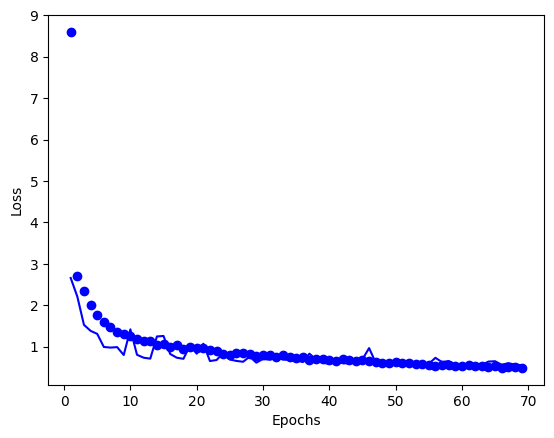

In [143]:
history_dict = history.history
loss= history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss,'bo',label="Training loss")
plt.plot(range(1, len(loss) + 1), val_loss,'b',label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [144]:
results=model.evaluate(features_test, labels_test, verbose=0)
print("Test results : {results}".format(results=results))

Test results : [0.4894619584083557, 0.48604923486709595]


In [145]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(features_val)
predictions[0]
predictions[1]

mse= mean_squared_error(labels_val,predictions)


print("MSE: %0.4f" % (mse))
rmse= np.sqrt(mse)
print("RMSE: %0.4f" % (rmse))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MSE: 0.4205
RMSE: 0.6484


In [146]:
labels_val=np.array(labels_val)
labels_val[0]
labels_val[1]

6

In [147]:
import pygad

desidered_output=10
def fitness_func(ga_instance,solution,solution_idx):
    input_array=np.array(solution)
    input_array_for_prediction = np.expand_dims(input_array,axis=0)
    output= model.predict(input_array_for_prediction)
    print("output: ",output)
    fitness = 1.0 / np.abs(output - desidered_output)
    return fitness

#sol_per_pop=100
#num_generations=1000
#num_genes=len(features_train)
#num_parents_mating=5

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = 11

init_range_low = -1
init_range_high = 10

gene_space = [np.arange(4.0, 15.0, 0.1),np.arange(0, 0.9, 0.01),np.arange(0, 1, 0.01),
              np.arange(0, 18.0, 0.1),np.arange(0.05, 0.5, 0.001),
              np.arange(2, 60, 1),np.arange(6, 160, 1),np.arange(0.800, 1.100, 0.001),np.arange(2.8, 4.0, 0.1),
              np.arange(0.10, 2.00, 0.01),np.arange(8.0, 15.0, 0.1)]

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

#ga_instance=pygad.GA(num_generations=num_generations,sol_per_pop=sol_per_pop,fitness_func=fitness_func,num_genes=num_genes,num_parents_mating=num_parents_mating,m#utation_type=None)
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       #init_range_low=init_range_low,
                       #init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/home/niccolo/python-projects/optimization/env/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


output:  [[6.947922]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
output:  [[7.320034]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
output:  [[5.8669624]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
output:  [[13.965031]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
output:  [[17.304375]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
output:  [[8.77989]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
output:  [[17.321186]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
output:  [[5.1929984]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
output:  [[12.663376]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
output:  [[6.3488593]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
output:  [[13.985014]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
output:  [[8.690211]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
output:  [[7.943979]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
output:  [[7.543854]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
output:  [[14.028918]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
output:  [[8.79161]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
output:  [[7.808987]]
1/1 ━━━━━━━

In [148]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

input_array=np.array(solution)
input_array_for_prediction = np.expand_dims(input_array,axis=0)
    
prediction =  model.predict(input_array_for_prediction)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
output:  [[10.04421]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
output:  [[9.870155]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
output:  [[9.947553]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
output:  [[10.176363]]
Parameters of the best solution : [1.38e+01 2.00e-01 1.10e-01 4.10e+00 2.65e-01 2.20e+01 1.32e+02 9.27e-01
 3.10e+00 1.77e+00 1.47e+01]
Fitness value of the best solution = [[927.94336]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted output based on the best solution : [[10.001078]]
